In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
np.random.seed(seed=42)

from collections import Counter

Every DISCRETE random variable has a what is called a 'pmf' function associated with it. Using the pmf function is like using the stats tables in the back of the book! 

## Binomial Random Variable

What is the probability of getting two tails if you make 2 flips of a fair coin?

In [133]:
n = 2
p = 0.5

# The binomial random variable can take the value 0, 1, or 2 in this case
# two tails means we need probability of getting a '0'
stats.binom.pmf(0,n,p)

0.25

In [134]:
stats.binom.pmf(0,n,p) + stats.binom.pmf(1,n,p) + stats.binom.pmf(2,n,p)

1.0

In [137]:
stats.binom.pmf([0,1,2],n,p)

array([0.25, 0.5 , 0.25])

In [136]:
sum(stats.binom.pmf([0,1,2],n,p))

1.0

What is the probability of getting at least one heads if you make 2 flips of a fair coin?

In [69]:
n = 2
p = 0.5

# We know that one heads has value = 1 and two heads has value = 2

# so, we need probability of getting a '1' + probability of getting a '2'

print(stats.binom.pmf([1,2],n,p))

# Take the sum to find the answer
np.sum(stats.binom.pmf([1,2],n,p))

[0.5  0.25]


0.75

What is the probability of getting exactly two tails if you make 5 flips of a fair coin?

In [68]:
n = 5
p = 0.5

# exactly two tails means exactly three heads in whatever combo, so we need probability(3)
stats.binom.pmf(3,n,p)

0.3125

In [119]:
# What is the probability of getting 36 heads if you make 36 flips of a fair coin?
n = 36
p = 0.5

stats.binom.pmf(36,n,p)

1.4551915228366858e-11

In [120]:
# What is the probability of getting 56 heads if you make 56 flips of a fair coin?
n = 56
p = 0.5

stats.binom.pmf(56,n,p)

1.3877787807814488e-17

What is the probability of getting 56 heads if you make 56 flips with p = 0.9999?

In [140]:
n = 56
p = 0.9999

stats.binom.pmf(56,n,p)

0.9944153723166914

### Continuous Variables have a pdf. But, in practice, you actually use the cdf (cumulative distribution function) for continuous functions.

### The cdf gives you the probability that you get a number **less than or equal to** the number you input

For normal distributions, 
loc = mean and scale = standard deviation


Question: What is the probability that I'll get a 2 or less from a standard normal?

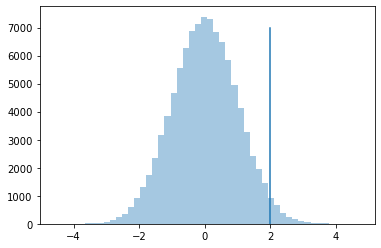

In [79]:
# I could graph what this might look like as follows:
I want the probability to the LEFT of the blue line
plt.axvline(2,0,0.9)
sns.distplot(stats.norm.rvs(size=400000), kde=False)

In [81]:
# Here is the answer
stats.norm.cdf(2, loc=0, scale=1)

0.9772498680518208

Question: What is the probability that I'll get a 10 or less from a normal distribution with mean = 7 and std deviation = 5.5?

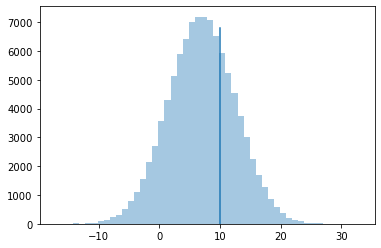

In [82]:
# I could graph what this might look like as follows:
# As before, I want the probability to the LEFT of the blue line

plt.axvline(10,0,0.9)
sns.distplot(stats.norm.rvs(loc=7, scale = 5.5, size=400000), kde=False)

In [83]:
# And here is the answer
stats.norm.cdf(10, loc=7, scale=5.5)

0.7072795327155363

Question: What is the probability that I'll get a 20 or **greater** from a normal distribution with mean = 4.5 and std deviation = 8?

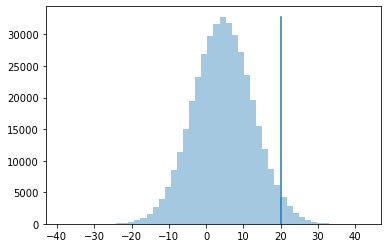

In [90]:
# I could graph what this might look like as follows:
# NOW, I want the probability to the RIGHT of the blue line!!!

plt.axvline(20,0,0.95)
sns.distplot(stats.norm.rvs(loc=4.5, scale = 8, size=400000), kde=False)

To answer this problem correctly, you use the cdf **and** the fact that total probability (aka the area under the normal curve) is equal to one:

In [89]:
# here is the answer
1 - stats.norm.cdf(20, loc=4.5, scale=8)

0.026342126689141487

### If you ever need to compute the cutoff points for a one-tailed test, you can use the 'ppf' function

In [110]:
# one-tailed test cutoff for standard normal distribution and 95% confidence
one = stats.norm.ppf(0.95)
one

1.6448536269514722

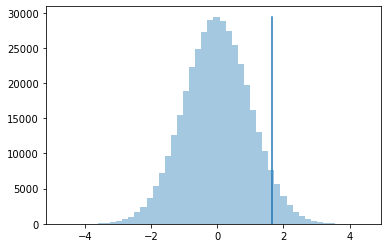

In [107]:
# If our test statistic falls to the RIGHT of the line, we'd reject the null hypothesis
plt.axvline(one,0,0.95)
sns.distplot(stats.norm.rvs(size=400000), kde=False)

In [112]:
# one-tailed test cutoff for norm distribution with mean = -2 and std dev = 4 and 95% confidence interval
one = stats.norm.ppf(0.95, loc = -2, scale = 4)
one

4.579414507805889

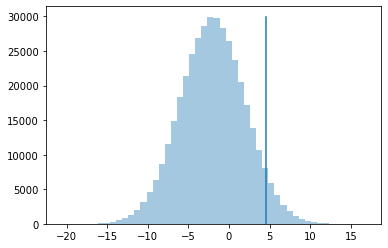

In [113]:
plt.axvline(one,0,0.95)
sns.distplot(stats.norm.rvs(loc= -2, scale = 4, size=400000), kde=False)

In [117]:
# this finds the 95% cutoff point for a one-sided t distribution with df= 15
one = stats.t.ppf( 0.95, df=15)
one

1.7530503556925547

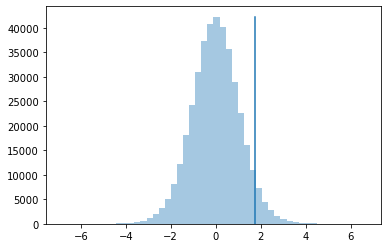

In [116]:
plt.axvline(one,0,0.95)
sns.distplot(stats.t.rvs(df=15, size=400000), kde=False)

If you ever need to compute the cutoff points for a **two-tailed test**, you can use the interval function

In [141]:
# this finds the symmetric 95% interval for a normal
stats.norm.interval(0.95, loc=0, scale=1)

(-1.959963984540054, 1.959963984540054)

In [94]:
# this finds the symmetric 95% interval for a t distribution with df= 15
stats.t.interval(0.95, df=15 )

(-2.131449545559323, 2.131449545559323)

In [131]:
dir(stats)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_ksstats',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_c